# **Intercomparison Demo**

**Author:** Adam Yang (ayang115@umd.edu)

**Description** Demo for Intercomparison Script: extracts test points, provided from hand labeled maps, from industry covermaps (Harvest, Copernicus, ESA, GLAD) and determines accuracy across maps.


In [1]:
# Authenticate notebook for Earth Engine use. Only needs to be run once, but is required for functions to work!
# !earthengine authenticate

In [1]:
import sys
sys.path.append('../')
from src.compare_covermaps import *

c:\Users\adamf\anaconda3\envs\intercomparison\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas
import ee
from shapely import wkt

In [3]:
set1_maps = [TARGETS["harvest_togo"], TARGETS["harvest_kenya"], TARGETS["harvest_tanzania"], TARGETS["copernicus"], TARGETS["esa"], TARGETS["glad"]]
set1_countries = ["Togo", "Kenya", "Tanzania"]

In [4]:
test1 = TestCovermaps(test_countries=set1_countries, covermaps=set1_maps)

In [5]:
# test1_test = test1.get_test_points()
test1_test = pd.read_csv("../../intercomparison-data/extracted/test/tgo_tan_ken_2019_clipped.csv").drop("Unnamed: 0", axis=1)
test1_test["geometry"] = test1_test["geometry"].apply(wkt.loads)
test1_test = gpd.GeoDataFrame(test1_test, crs="epsg:4326")

In [6]:
test1.extract_covermaps(test1_test)

[Togo] sampling harvest_togo...
[Togo] sampling copernicus...
[Togo] sampling esa...
[Togo] sampling glad...
[Kenya] sampling harvest_kenya...
[Kenya] sampling copernicus...
[Kenya] sampling esa...
[Kenya] sampling glad...
[Tanzania] sampling harvest_tanzania...
[Tanzania] sampling copernicus...
[Tanzania] sampling esa...
[Tanzania] sampling glad...


{'Togo':            lat       lon  class_probability country   subset  \
 0     9.875907  1.172471               0.00    Togo  testing   
 1     9.180105  1.374695               0.25    Togo  testing   
 2     9.275314  1.196385               0.00    Togo  testing   
 3     7.346575  0.705167               0.00    Togo  testing   
 4     6.777337  0.629817               0.25    Togo  testing   
 ..         ...       ...                ...     ...      ...   
 347   6.472810  1.502436               0.75    Togo  testing   
 348  11.037647  0.048311               1.00    Togo  testing   
 349   9.011538  1.493877               0.00    Togo  testing   
 350   9.138645  1.391047               0.00    Togo  testing   
 351   9.186742  1.344951               0.00    Togo  testing   
 
                      geometry  binary  harvest_togo  copernicus  esa  glad  
 0     POINT (1.17247 9.87591)       0             0           0    0     0  
 1     POINT (1.37469 9.18011)       0             0  

In [7]:
test1.sampled_maps["Kenya"]

,lat,lon,class_probability,country,subset,geometry,binary,harvest_kenya,copernicus,esa,glad
0,0.725122,34.386282,0.0,Kenya,testing,POINT (34.38628 0.72512),0,1,0,0,1
1,0.621939,34.466496,0.0,Kenya,testing,POINT (34.46650 0.62194),0,1,0,0,0
2,0.226497,34.054859,0.0,Kenya,testing,POINT (34.05486 0.22650),0,0,1,0,0
3,0.096834,33.951959,0.0,Kenya,testing,POINT (33.95196 0.09683),0,0,0,0,0
4,0.032072,33.968469,0.0,Kenya,testing,POINT (33.96847 0.03207),0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
759,0.633255,34.313450,1.0,Kenya,testing,POINT (34.31345 0.63326),1,1,1,0,1
760,0.630631,34.314150,1.0,Kenya,testing,POINT (34.31415 0.63063),1,1,1,1,1
761,0.625610,34.307610,1.0,Kenya,testing,POINT (34.30761 0.62561),1,1,1,0,1
762,0.694220,34.369890,1.0,Kenya,testing,POINT (34.36989 0.69422),1,1,1,0,1


In [8]:
test1.evaluate()
test1.results["Tanzania"]

evaluating maps...
dataset: harvest_togo | country: Togo
dataset: copernicus | country: Togo
dataset: esa | country: Togo
dataset: glad | country: Togo
dataset: harvest_kenya | country: Kenya
dataset: copernicus | country: Kenya
dataset: esa | country: Kenya
dataset: glad | country: Kenya
dataset: harvest_tanzania | country: Tanzania
dataset: copernicus | country: Tanzania
dataset: esa | country: Tanzania
dataset: glad | country: Tanzania


,dataset,country,crop_f1,accuracy,crop_support,noncrop_support,crop_recall,noncrop_recall,crop_precision,noncrop_precision
0,harvest_tanzania,Tanzania,0.708861,0.760573,767,770,0.584094,0.936364,0.901408,0.693269
0,copernicus,Tanzania,0.742681,0.782694,767,770,0.628422,0.936364,0.907721,0.716700
0,esa,Tanzania,0.741627,0.789200,767,770,0.606258,0.971429,0.954825,0.712381
0,glad,Tanzania,0.718494,0.776187,767,770,0.572360,0.979221,0.964835,0.696858


In [9]:
test1.results["Togo"]

,dataset,country,crop_f1,accuracy,crop_support,noncrop_support,crop_recall,noncrop_recall,crop_precision,noncrop_precision
0,harvest_togo,Togo,0.747541,0.781250,152,200,0.750000,0.805,0.745098,0.809045
0,copernicus,Togo,0.569170,0.690341,152,200,0.473684,0.855,0.712871,0.681275
0,esa,Togo,0.629787,0.752841,152,200,0.486842,0.955,0.891566,0.710037
0,glad,Togo,0.562771,0.713068,152,200,0.427632,0.930,0.822785,0.681319


#

In [10]:
test1.results["Kenya"]

,dataset,country,crop_f1,accuracy,crop_support,noncrop_support,crop_recall,noncrop_recall,crop_precision,noncrop_precision
0,harvest_kenya,Kenya,0.921514,0.888743,571,193,0.873905,0.932642,0.974609,0.714286
0,copernicus,Kenya,0.937824,0.905759,571,193,0.950963,0.772021,0.925043,0.841808
0,esa,Kenya,0.333333,0.397906,571,193,0.201401,0.979275,0.966387,0.293023
0,glad,Kenya,0.883978,0.835079,571,193,0.840630,0.818653,0.932039,0.634538


# OLD

In [ ]:
covermap_results

,dataset,country,crop_f1,accuracy,crop_support,noncrop_support,crop_recall,noncrop_recall,crop_precision,noncrop_precision
0,harvest,Kenya,0.921514,0.888743,571,193,0.873905,0.932642,0.974609,0.714286
0,cop,Kenya,0.937824,0.905759,571,193,0.950963,0.772021,0.925043,0.841808
0,esa,Kenya,0.333333,0.397906,571,193,0.201401,0.979275,0.966387,0.293023
0,glad,Kenya,0.883978,0.835079,571,193,0.840630,0.818653,0.932039,0.634538
0,harvest,Tanzania,0.708861,0.760573,767,770,0.584094,0.936364,0.901408,0.693269
0,cop,Tanzania,0.742681,0.782694,767,770,0.628422,0.936364,0.907721,0.716700
0,esa,Tanzania,0.741627,0.789200,767,770,0.606258,0.971429,0.954825,0.712381
0,glad,Tanzania,0.718494,0.776187,767,770,0.572360,0.979221,0.964835,0.696858
0,harvest,Togo,0.747541,0.781250,152,200,0.750000,0.805000,0.745098,0.809045
0,cop,Togo,0.569170,0.690341,152,200,0.473684,0.855000,0.712871,0.681275


Breaking down by country 

In [ ]:
results_by_country = {}
for country, df in covermap_results.groupby("country"):
    results_by_country[country] = df


In [ ]:
results_by_country["Togo"].sort_values("crop_f1", ascending=False)

,dataset,country,crop_f1,accuracy,crop_support,noncrop_support,crop_recall,noncrop_recall,crop_precision,noncrop_precision
0,harvest,Togo,0.747541,0.781250,152,200,0.750000,0.805,0.745098,0.809045
0,esa,Togo,0.629787,0.752841,152,200,0.486842,0.955,0.891566,0.710037
0,cop,Togo,0.569170,0.690341,152,200,0.473684,0.855,0.712871,0.681275
0,glad,Togo,0.562771,0.713068,152,200,0.427632,0.930,0.822785,0.681319


In [ ]:
results_by_country["Kenya"].sort_values("crop_f1", ascending=False)

,dataset,country,crop_f1,accuracy,crop_support,noncrop_support,crop_recall,noncrop_recall,crop_precision,noncrop_precision
0,cop,Kenya,0.937824,0.905759,571,193,0.950963,0.772021,0.925043,0.841808
0,harvest,Kenya,0.921514,0.888743,571,193,0.873905,0.932642,0.974609,0.714286
0,glad,Kenya,0.883978,0.835079,571,193,0.840630,0.818653,0.932039,0.634538
0,esa,Kenya,0.333333,0.397906,571,193,0.201401,0.979275,0.966387,0.293023


In [ ]:
results_by_country["Tanzania"].sort_values("crop_f1", ascending=False)

,dataset,country,crop_f1,accuracy,crop_support,noncrop_support,crop_recall,noncrop_recall,crop_precision,noncrop_precision
0,cop,Tanzania,0.742681,0.782694,767,770,0.628422,0.936364,0.907721,0.716700
0,esa,Tanzania,0.741627,0.789200,767,770,0.606258,0.971429,0.954825,0.712381
0,glad,Tanzania,0.718494,0.776187,767,770,0.572360,0.979221,0.964835,0.696858
0,harvest,Tanzania,0.708861,0.760573,767,770,0.584094,0.936364,0.901408,0.693269


Visuals

In [ ]:
covermaps["agreement"] = covermaps.apply(lambda x: np.sum(x[["cop", "esa", "glad", "harvest"]])/4, axis=1)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

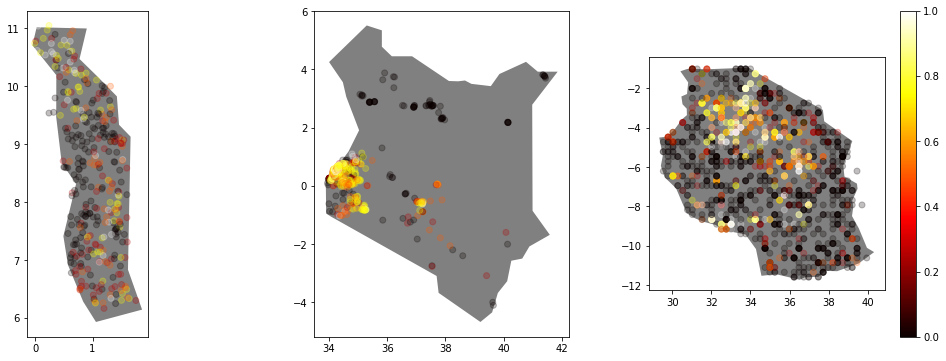

In [ ]:
togo = world.loc[world["iso_a3"] == "TGO"]
kenya = world.loc[world["iso_a3"] == "KEN"]
tanz = world.loc[world["iso_a3"] == "TZA"]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

togo.plot(ax=ax1, color="Gray")
covermaps.loc[covermaps["country"]=="Togo"].plot(ax=ax1, column="agreement", cmap="hot", alpha=0.25)

kenya.plot(ax=ax2, color="Gray")
covermaps.loc[covermaps["country"]=="Kenya"].plot(ax=ax2, column="agreement", cmap="hot", alpha=0.25)

tanz.plot(ax=ax3, color="Gray")
covermaps.loc[covermaps["country"]=="Tanzania"].plot(ax=ax3, column="agreement", cmap="hot", alpha=0.25, legend=True)
